# Procesamiento de Imágenes

### Transformada de Fourier en 2D

El objetivo de esta práctica es familiarizarse con el procesamiento básico de imágenes y adquirir conocimientos prácticos sobre el análisis de imágenes mediante la Transofrmada RRápida de Fourier en 2D-

Y = fft(X) calcula la transformada discreta de Fourier (DFT) de X utilizando un algoritmo de transformada rápida de Fourier (FFT).

*   Si X es un vector, fft(X) devuelve la transformada de Fourier del vector.

*   Si X es una matriz, fft(X) trata las columnas de X como vectores y devuelve la transformada de Fourier de cada columna.

*   Si X es un arreglo multidimensional, fft(X) trata los valores en la primera dimensión del arreglo cuyo tamaño no es igual a 1 como vectores y devuelve la transformada de Fourier de cada vector.

##### **Actividades:**

1. Cargar archivo de tipo imagen.
2. Convertir imagen a escala de grises.
3. Normalizar imagen.
4. Aplicar FFT2. Graficar FFT2 y fase.
5. Generar máscara filtro pasa altas y pasa bajas.
6. Generar máscara filtro pasa bandas.
7. Generar máscara filtro rechaza bandas.
8. Aplicar filtro pasa altas y pasa bajas. Graficar FFT2 y fase.
9. Aplicar filtro pasa bandas. Graficar FFT2 y fase.
10. Aplicar filtro rechaza bandas. Graficar FFT2 y fase.
11. Aplicar FFT Inversa al resultado de haber utilizado el filtro rechaza-banda.




##### **Información Adicional:**

*   Selecciona una imagen que sea de tu agrado, solo procura que tenga muchos bordes para que sean más notorias las acciones que realices con los filtros.
*   Procura utilizar una imagen en formato PNG

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.fft import fft2,fftshift

In [3]:
def load_image(path):
    img=cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

In [8]:
A = load_image('D:/Documentos/Procesamiento_biose-ales/figures/fotografo.jpeg')

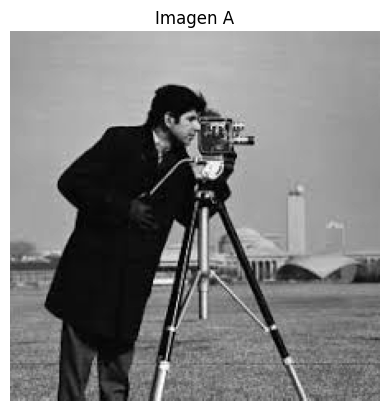

In [9]:
plt.figure()
plt.imshow(A, cmap='gray')
plt.title('Imagen A')
plt.axis("off")

#Normalizando la imagen
imgA = A/255

# Calculando FFT
fftA = fft2(imgA)
#Magnitud
abs_fftA = np.abs(fftshift(fftA))
#Ángulo
ang_fftA = np.angle(fftshift(fftA))



### Gráficar en 3D la magnitud de FFT2 de la imagen A

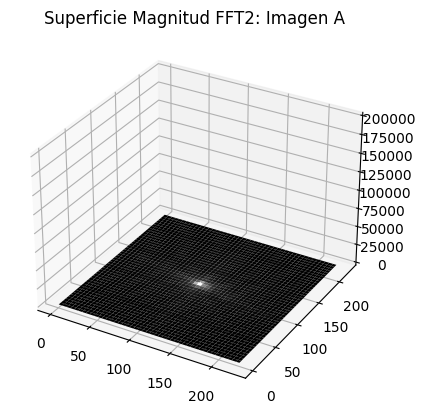

In [10]:

x = np.arange(0,225)
y = np.arange(225,0,-1)
x, y = np.meshgrid(x,y)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surface = ax.plot_surface(x, y,  abs_fftA, cmap=cm.gray, linewidth=0, antialiased=True)
ax.set_zlim(0, 200000)
plt.title('Superficie Magnitud FFT2: Imagen A')
plt.show()

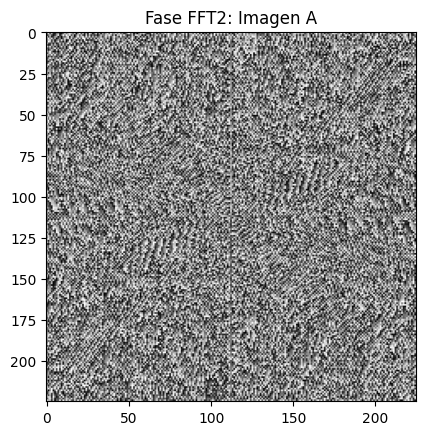

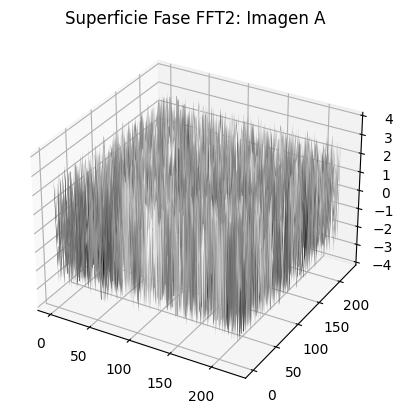

In [11]:
#plt.figure(num=4, figsize=(10, 8), dpi=80)
plt.figure()
plt.imshow(ang_fftA, cmap ='gray');
plt.title('Fase FFT2: Imagen A');


x = np.arange(0,225)
y = np.arange(0,225)
x, y = np.meshgrid(x,y)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surface = ax.plot_surface(x, y,  ang_fftA, cmap=cm.gray, linewidth=0, antialiased=True)
ax.set_zlim(-4, 4)
plt.title('Superficie Fase FFT2: Imagen A')
plt.show()

##### Generar máscara para filtro pasa-bajas

In [12]:
mask_pb=np.zeros(imgA.shape)

[ax,ay]=imgA.shape
x_=round(ax/2)
y_=round(ay/2)

tam=20
mask_pb[x_-tam:x_+tam,y_-tam:y_+tam]=1

##### Generar máscara para filtro pasa-altas

In [13]:
mask_pa= 1 - mask_pb 

lim_sup = 20
lim_inf = 12

##### Generar máscara para filtro pasa-banda

In [ ]:
mask_bp=np.zeros(imgA.shape, np.uint8)
mask_bp[x_-lim_sup:x_+lim_sup,y_-lim_sup:y_+lim_sup]=1
mask_bp[x_-lim_inf:x_+lim_inf,y_-lim_inf:y_+lim_inf]=0

##### Generar máscara para filtro rechaza-banda

In [15]:
mask_sp=1-mask_bp

#### Graficar todos los filtros

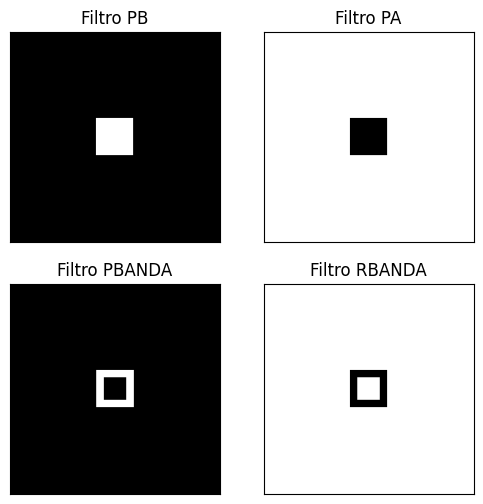

In [16]:
titles = ['Filtro PB','Filtro PA','Filtro PBANDA','Filtro RBANDA']
filtros = [mask_pb,mask_pa,mask_bp,mask_sp]
plt.figure(num=6,figsize=(6, 6))
for i in range(len(filtros)):
    plt.subplot(2,2,i+1),plt.imshow(filtros[i],cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


#### Aplicando filtro rechaza banda

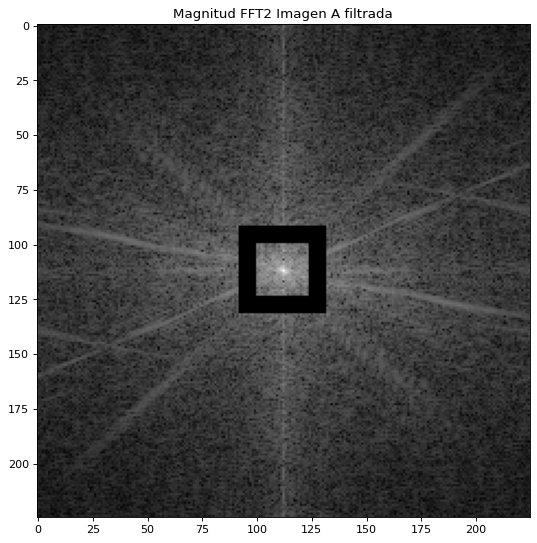

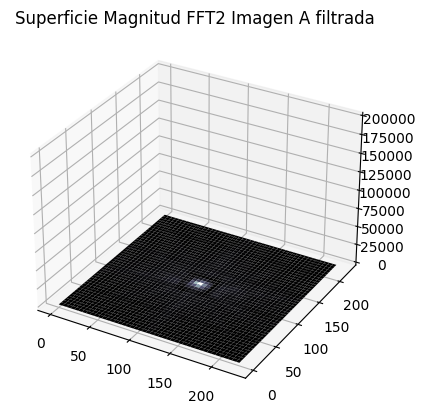

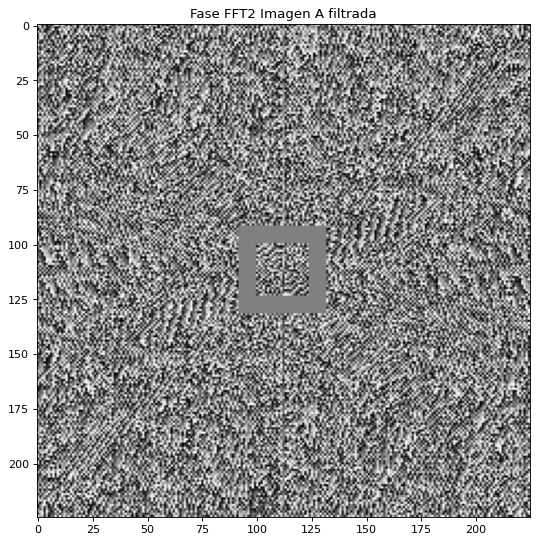

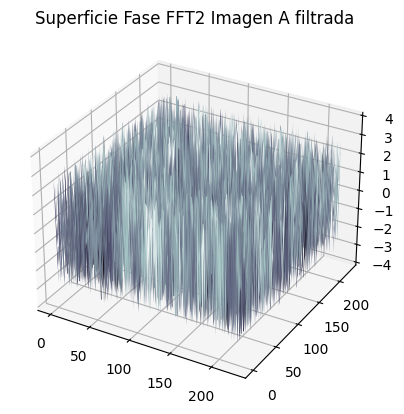

In [17]:

abs_fftA_mask_sp=abs_fftA*mask_sp
ang_fftA_mask_sp=ang_fftA*mask_sp

plt.figure(num=7, figsize=(10, 8), dpi=80)
plt.imshow(100*np.log(1+abs_fftA_mask_sp), cmap='gray');
plt.title('Magnitud FFT2 Imagen A filtrada')


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surface = ax.plot_surface(x, y,  abs_fftA_mask_sp, cmap=cm.bone, linewidth=0, antialiased=True)
ax.set_zlim(0, 200000)
plt.title('Superficie Magnitud FFT2 Imagen A filtrada')
plt.show()

plt.figure(num=9, figsize=(10, 8), dpi=80)
plt.imshow(ang_fftA_mask_sp, cmap='gray');
plt.title('Fase FFT2 Imagen A filtrada');


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surface = ax.plot_surface(x, y,  ang_fftA_mask_sp, cmap=cm.bone, linewidth=0, antialiased=True)
ax.set_zlim(-4, 4)
plt.title('Superficie Fase FFT2 Imagen A filtrada')
plt.show()

#### Aplicando FFT Inversa al resultado de haber utilizado RECHAZA-BANDA

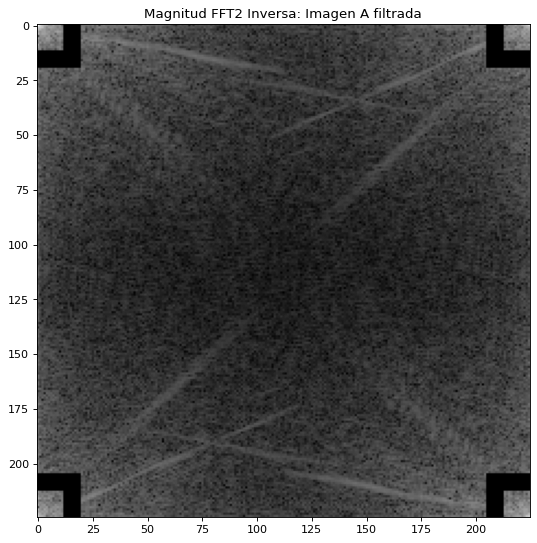

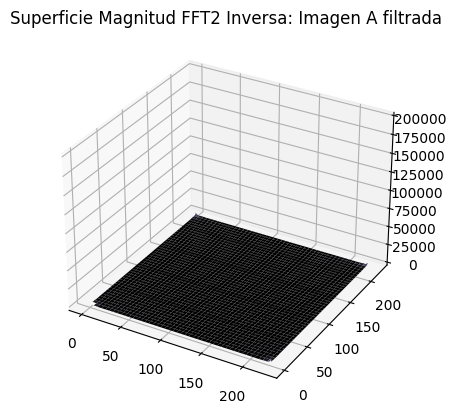

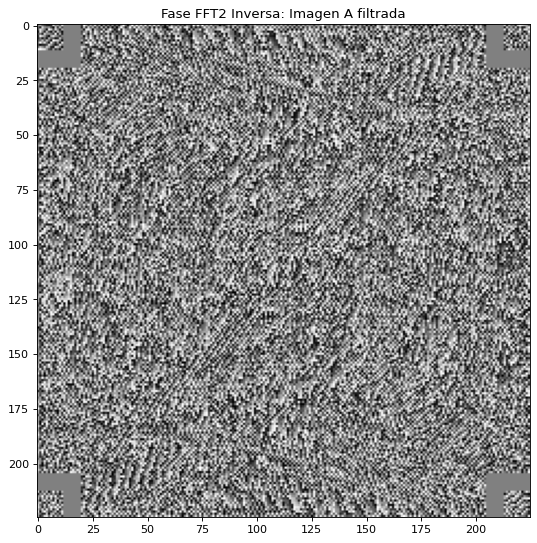

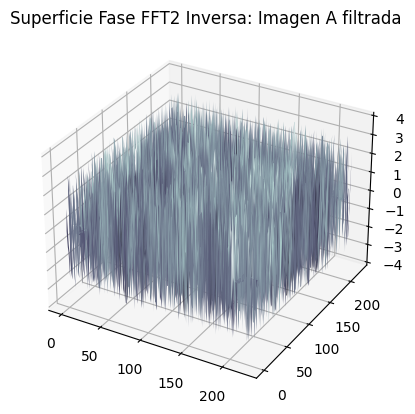

Text(0.5, 1.0, 'Imagen A recuperada')

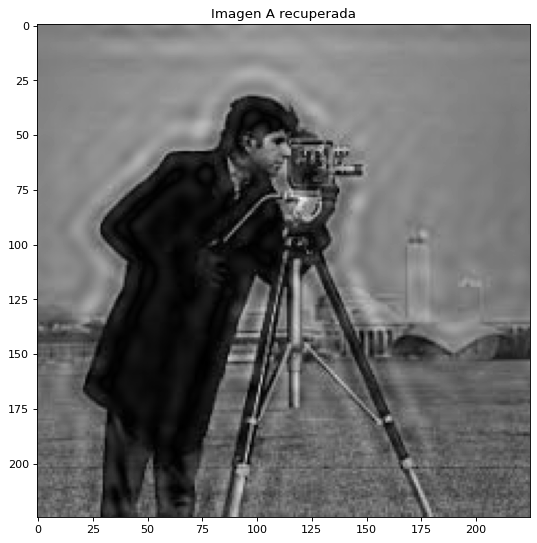

In [18]:

abs_fftA_mask_sp_inv=np.fft.ifftshift(abs_fftA_mask_sp)
ang_fftA_mask_sp_inv=np.fft.ifftshift(ang_fftA_mask_sp)

plt.figure(num=11, figsize=(10, 8), dpi=80)
plt.imshow(100*np.log(1+abs_fftA_mask_sp_inv), cmap='gray');
plt.title('Magnitud FFT2 Inversa: Imagen A filtrada')


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surface = ax.plot_surface(x, y,  abs_fftA_mask_sp_inv, cmap=cm.bone, linewidth=0, antialiased=True)
ax.set_zlim(0, 200000)
plt.title('Superficie Magnitud FFT2 Inversa: Imagen A filtrada')
plt.show()

plt.figure(num=13, figsize=(10, 8), dpi=80)
plt.imshow(ang_fftA_mask_sp_inv, cmap='gray');
plt.title('Fase FFT2 Inversa: Imagen A filtrada');


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surface = ax.plot_surface(x, y,  ang_fftA_mask_sp_inv, cmap=cm.bone, linewidth=0, antialiased=True)
ax.set_zlim(-4, 4)
plt.title('Superficie Fase FFT2 Inversa: Imagen A filtrada')
plt.show()

fftA_=abs_fftA_mask_sp_inv*np.exp(1j*ang_fftA_mask_sp_inv)
imgA_=np.fft.ifft2(fftA_)

plt.figure(num=15, figsize=(10, 8), dpi=80)
plt.imshow(np.abs(imgA_), cmap='gray');
plt.title('Imagen A recuperada')
